# My data analysis with the Stackoverflow data

This is my data analysis using the Stackoverflow data.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('./../data/stackoverflow/survey_results_public.csv', index_col= 'Respondent')
df.shape

(88883, 84)

In [53]:
df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [54]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

# Data clean up

## Understanding Developer Types

First I will replace the data with something smaller and more meaningful.

In [55]:
replacement = {
    "I am a developer by profession": "Professional", 
    "I am a student who is learning to code": "Student", 
    "I am not primarily a developer, but I write code sometimes as part of my work": "Sometimes",
    "I code primarily as a hobby": "Hobby",
    "I used to be a developer by profession, but no longer am": "X-Developer"
}

In [56]:
df["MainBranch"] = df["MainBranch"].replace(replacement, regex=True)
df["MainBranch"].head()

Respondent
1         Student
2         Student
3       Sometimes
4    Professional
5    Professional
Name: MainBranch, dtype: object

In [57]:
main_branch_count = df['MainBranch'].value_counts()
main_branch_count

MainBranch
Professional    65679
Student         10189
Sometimes        7539
Hobby            3340
X-Developer      1584
Name: count, dtype: int64

In [58]:
mb_label = main_branch_count.index.to_list()
mb_counts = main_branch_count.to_list()

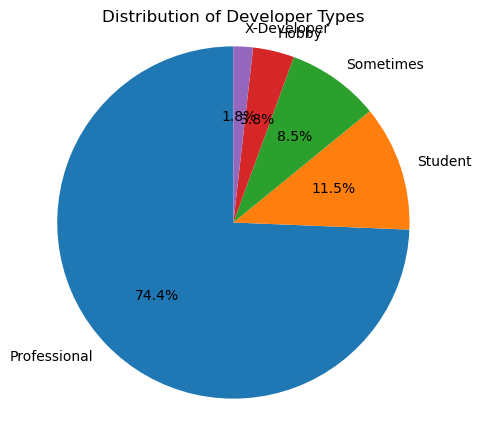

In [59]:
plt.figure(figsize=(5, 5))
plt.pie(mb_counts, labels=mb_label, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Developer Types")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

plt.show()

## Observations

Well, a basic trial to see what's the distribution of developers who have taken the survey.

1. Clearly, the most users are professionals. 
1. And, the we have a lot of students who are active on stack overflow and then people who are coding sometimes. 
1. X-Developers are the leat which does make sense. 

However, the hobby ones are the least which makes sense because they don't code so frequently.

### Understanding Years of code

In [63]:
years_of_code = df['YearsCode'].value_counts().sort_values(ascending=False)
years_lt_2000 = years_of_code[years_of_code < 2000]

In [61]:
def remove_years_of_code_lt_2000(value):
    if value in years_lt_2000:
        return 'Others'
    else:
        return value

In [64]:
df['YearsCode'] = df['YearsCode'].apply(remove_years_of_code_lt_2000)

In [75]:
prof_with_exp = df[(df['YearsCode'] != 'Others') & (df['MainBranch'] == 'Professional')]
prof_with_exp['YearsCode'].value_counts(ascending=False).head(15)

YearsCode
10    5641
5     4764
6     4664
8     4355
7     4221
15    3407
4     3345
12    3090
20    3067
9     2874
3     2518
11    2003
14    1883
13    1816
2     1571
Name: count, dtype: int64